## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
import xgboost as xgb
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

## Loading the dataset

In [2]:
train = pd.read_csv("../input/eda-avocado-prices/Filtered_dataset.csv")
train.drop(["Unnamed: 0"],axis=1,inplace=True)
train

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,price_types
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-01,2015-12-24,low
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-01,2015-12-17,low
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-01,2015-12-10,low
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-01,2015-12-03,low
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-01,2015-11-26,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02-01,2018-02-01,mean
11534,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01-01,2018-01-25,mean
11535,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01-01,2018-01-18,high
11536,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01-01,2018-01-11,expensive


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11538 non-null  object 
 1   AveragePrice  11538 non-null  float64
 2   Total Volume  11538 non-null  float64
 3   4046          11538 non-null  float64
 4   4225          11538 non-null  float64
 5   4770          11538 non-null  float64
 6   Total Bags    11538 non-null  float64
 7   Small Bags    11538 non-null  float64
 8   Large Bags    11538 non-null  float64
 9   XLarge Bags   11538 non-null  float64
 10  type          11538 non-null  object 
 11  year          11538 non-null  int64  
 12  region        11538 non-null  object 
 13  month         11538 non-null  object 
 14  week          11538 non-null  object 
 15  price_types   11537 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 1.4+ MB


In [4]:
x_train = train.drop(['Date','AveragePrice'],axis=1)
y_train = train['AveragePrice']

In [5]:
def check_rmse(model,x_val,y_val):
    pred = model.predict(x_val)
    return np.sqrt(mean_squared_error(y_val,pred))

In [6]:
le = preprocessing.LabelEncoder()
for i in x_train.columns:
    if x_train[i].dtype == 'object':
        x_train[i] = le.fit_transform(x_train[i].astype(str))
x_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,week,price_types
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,11,51,2
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,11,50,2
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,11,49,2
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,11,48,2
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,10,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,37,161,3
11534,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,36,160,3
11535,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,36,159,1
11536,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,36,158,0


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  11538 non-null  float64
 1   4046          11538 non-null  float64
 2   4225          11538 non-null  float64
 3   4770          11538 non-null  float64
 4   Total Bags    11538 non-null  float64
 5   Small Bags    11538 non-null  float64
 6   Large Bags    11538 non-null  float64
 7   XLarge Bags   11538 non-null  float64
 8   type          11538 non-null  int64  
 9   year          11538 non-null  int64  
 10  region        11538 non-null  int64  
 11  month         11538 non-null  int64  
 12  week          11538 non-null  int64  
 13  price_types   11538 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 1.2 MB


In [8]:
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train,random_state=26)

## Parameter tuning

In [9]:
def hyperParameterTuning(X_train, Y_train):
    param_tuning = {
        'objective': ['reg:squarederror'],
        'colsample_bytree': [0.1, 0.5],
        'subsample': [0.5, 0.99],
        'learning_rate': [0.05, 0.1, 0.5],
        'max_depth': [2, 5,10],
        'min_child_weight': [0, 1, 10],
        'n_estimators' : [700, 1000, 5000]
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 10)

    gsearch.fit(X_train,Y_train)

    return gsearch.best_params_

In [10]:
model1 =  XGBRegressor(objective = 'reg:squarederror', 
                        colsample_bytree = 0.7, 
                        learning_rate = 0.01, 
                        max_depth = 10, 
                        min_child_weight = 5, 
                        n_estimators = 500, 
                        subsample = 0.5,
                        seed=27,
                        tree_method='gpu_hist')

model2 =  XGBRegressor(learning_rate=0.01,
                           n_estimators=3000,
                           max_depth=5, 
                           min_child_weight=0,
                           gamma=0, 
                           subsample=0.7,                                
                           colsample_bytree=0.7,                                     
                           objective='reg:squarederror',                                
                           scale_pos_weight=1, 
                           seed=27,                                     
                           reg_alpha=0.00006,
                           tree_method='gpu_hist')

In [11]:
%time model1.fit(X_train, Y_train, early_stopping_rounds=50, eval_set=[(X_val, Y_val)], verbose=False)

CPU times: user 7.24 s, sys: 518 ms, total: 7.76 s
Wall time: 9.29 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.5, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [12]:
%time model2.fit(X_train, Y_train, early_stopping_rounds=50, eval_set=[(X_val, Y_val)], verbose=False)

CPU times: user 7.54 s, sys: 52.1 ms, total: 7.59 s
Wall time: 7.57 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.7, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [13]:
print(check_rmse(model1,X_val,Y_val))
print(check_rmse(model2,X_val,Y_val))

0.08531942373550266
0.08594037184458035


## Plotting scatter plot between few real and predicted values

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

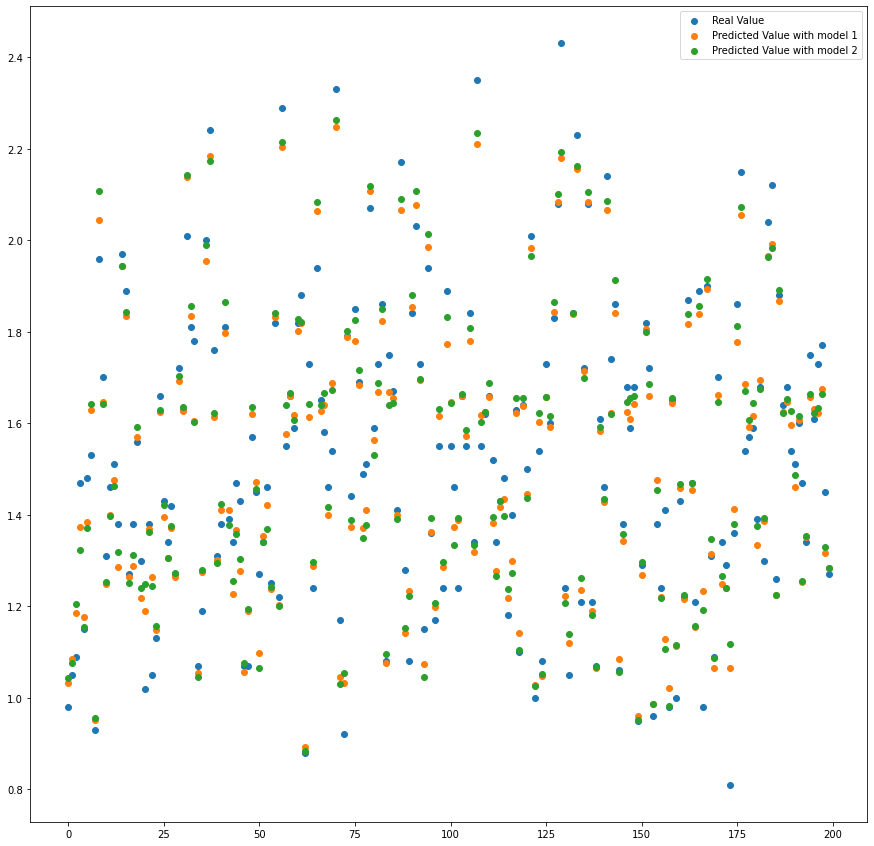

In [15]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.scatter(np.arange(0,len(Y_val[:200])),Y_val[:200] ,label="Real Value")
plt.scatter(np.arange(0,len(Y_val[:200])),model1.predict(X_val[:200]),label ="Predicted Value with model 1")
plt.scatter(np.arange(0,len(Y_val[:200])),model2.predict(X_val[:200]),label ="Predicted Value with model 2")
plt.legend()
plt.show()